In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# load dataset
df=pd.read_csv('C:/Users/debap/Downloads/Crop_Recommendation.csv')
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [3]:
#overview of data, it shows first 5 rows
df.head() 

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
# number of rows and columns in data
df.shape 

(2200, 8)

In [5]:
# checking for information about factors
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# checking for duplicate value
df.duplicated().sum() 

0

In [7]:
#Checking for missing value
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [8]:
# summary statistics
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# number of unique values in each factor
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

In [10]:
#checking for different types of crop in the dataset
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [11]:
# EXPLORATORY DATA ANALYSIS
# number of values under each crop type
df['Crop'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: Crop, dtype: int64

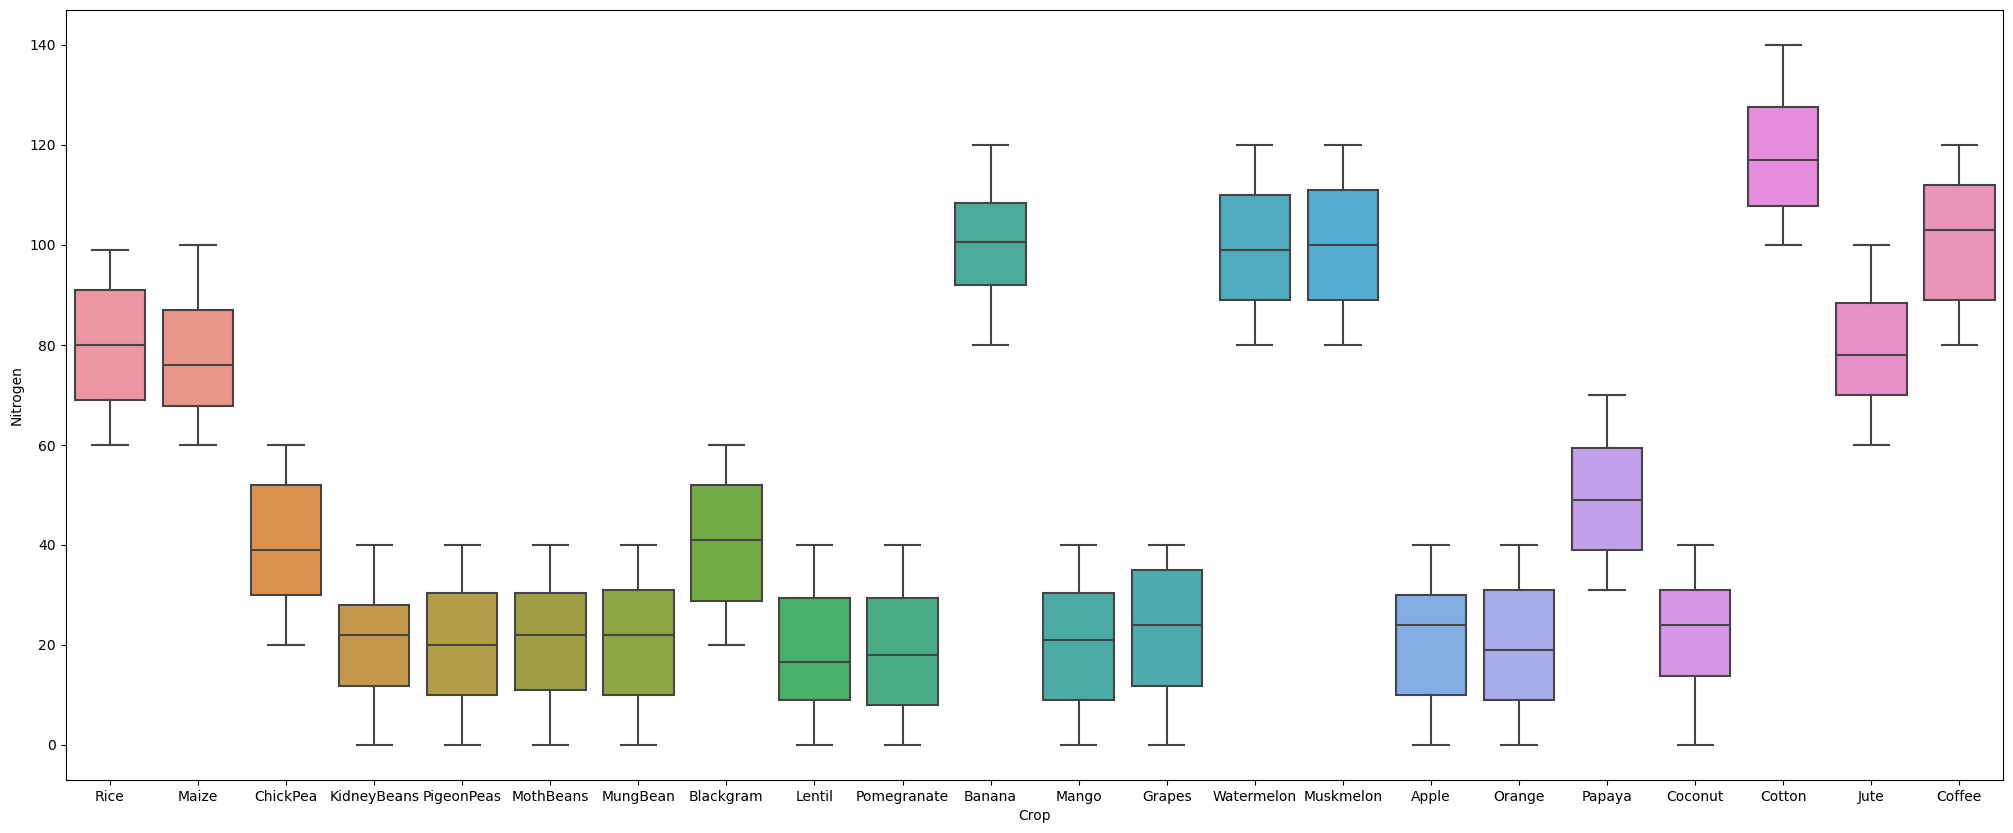

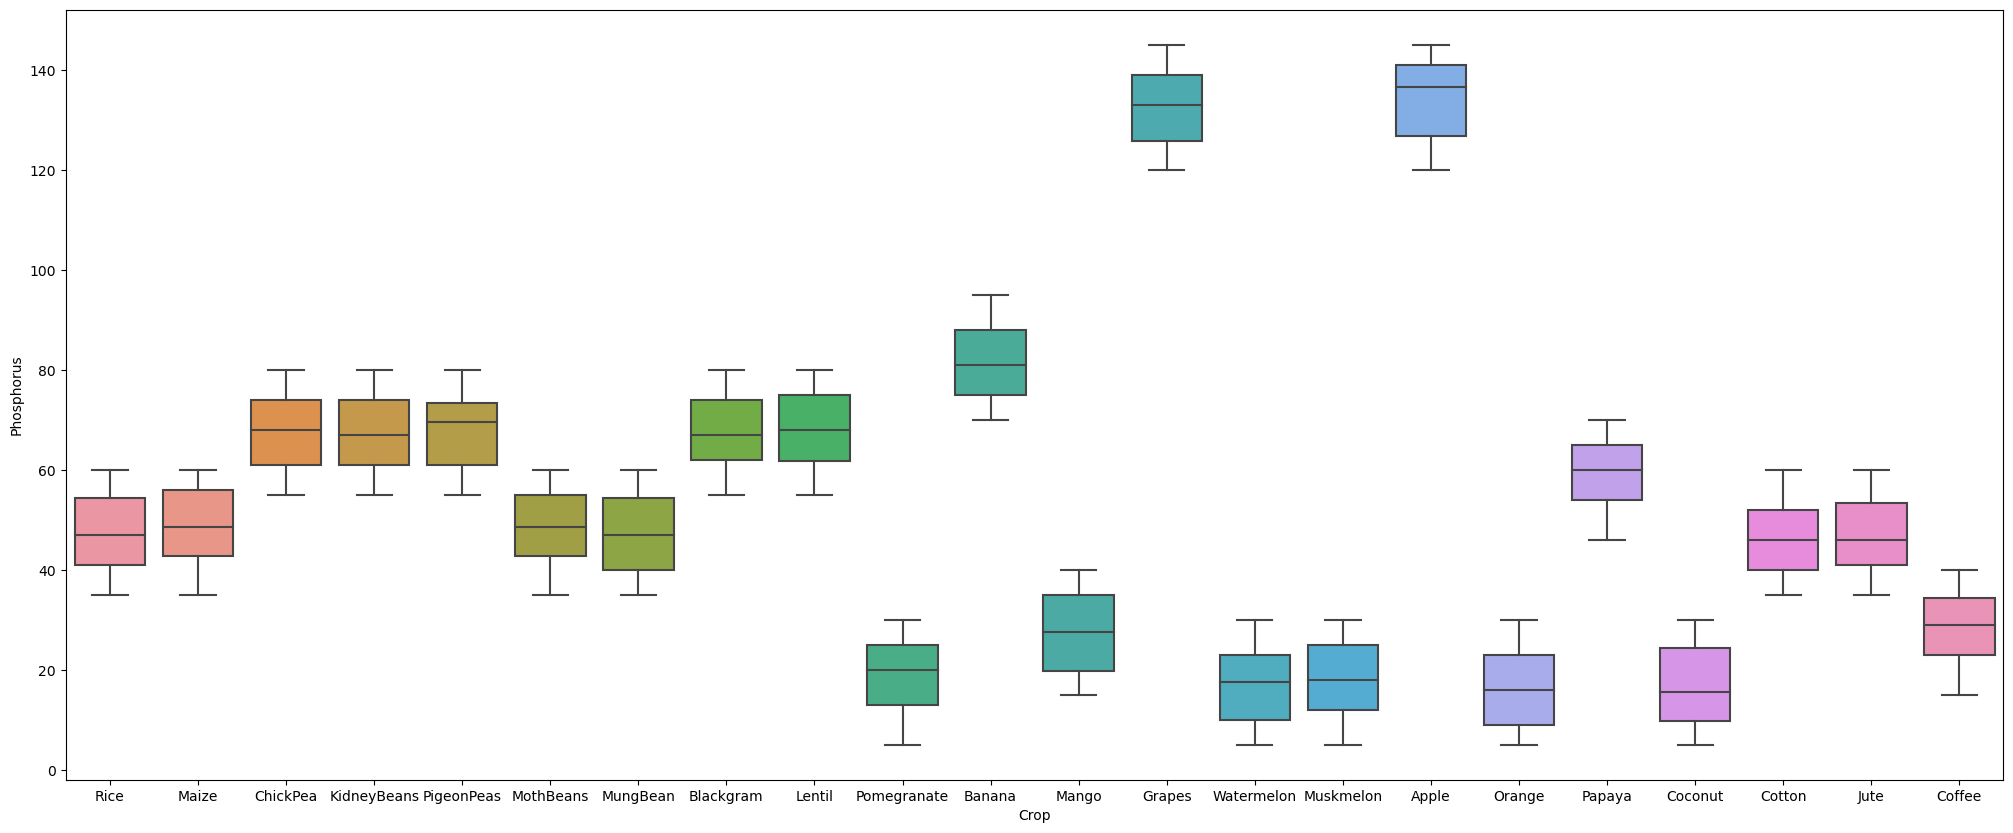

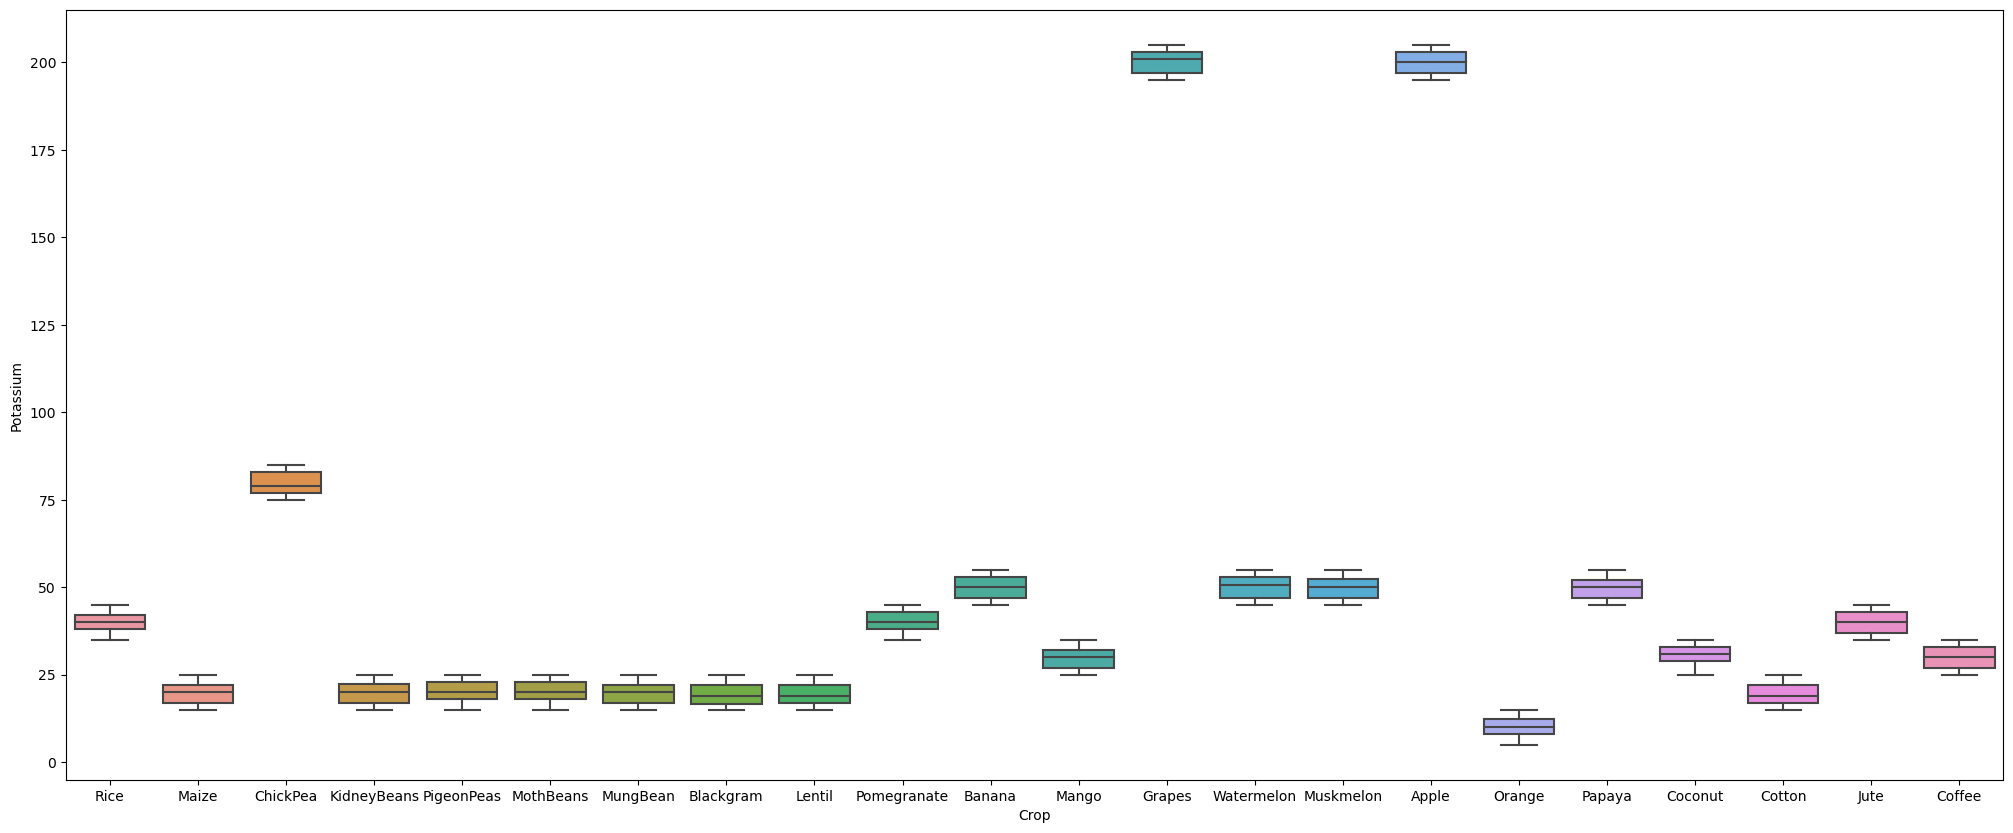

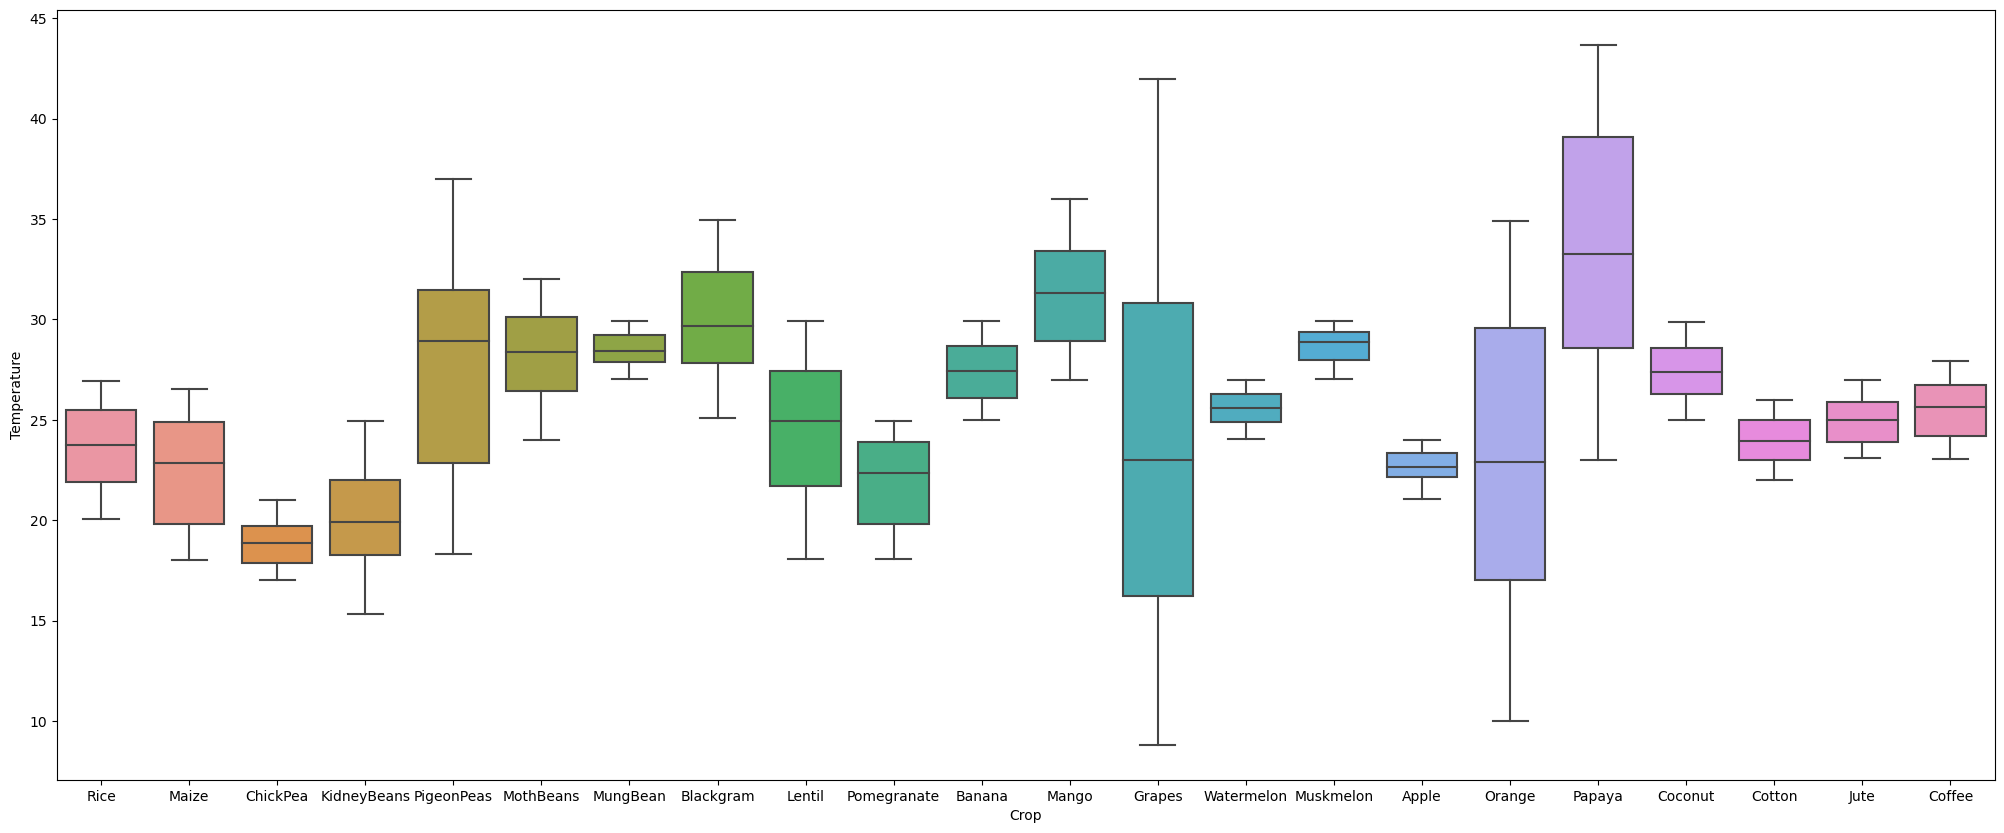

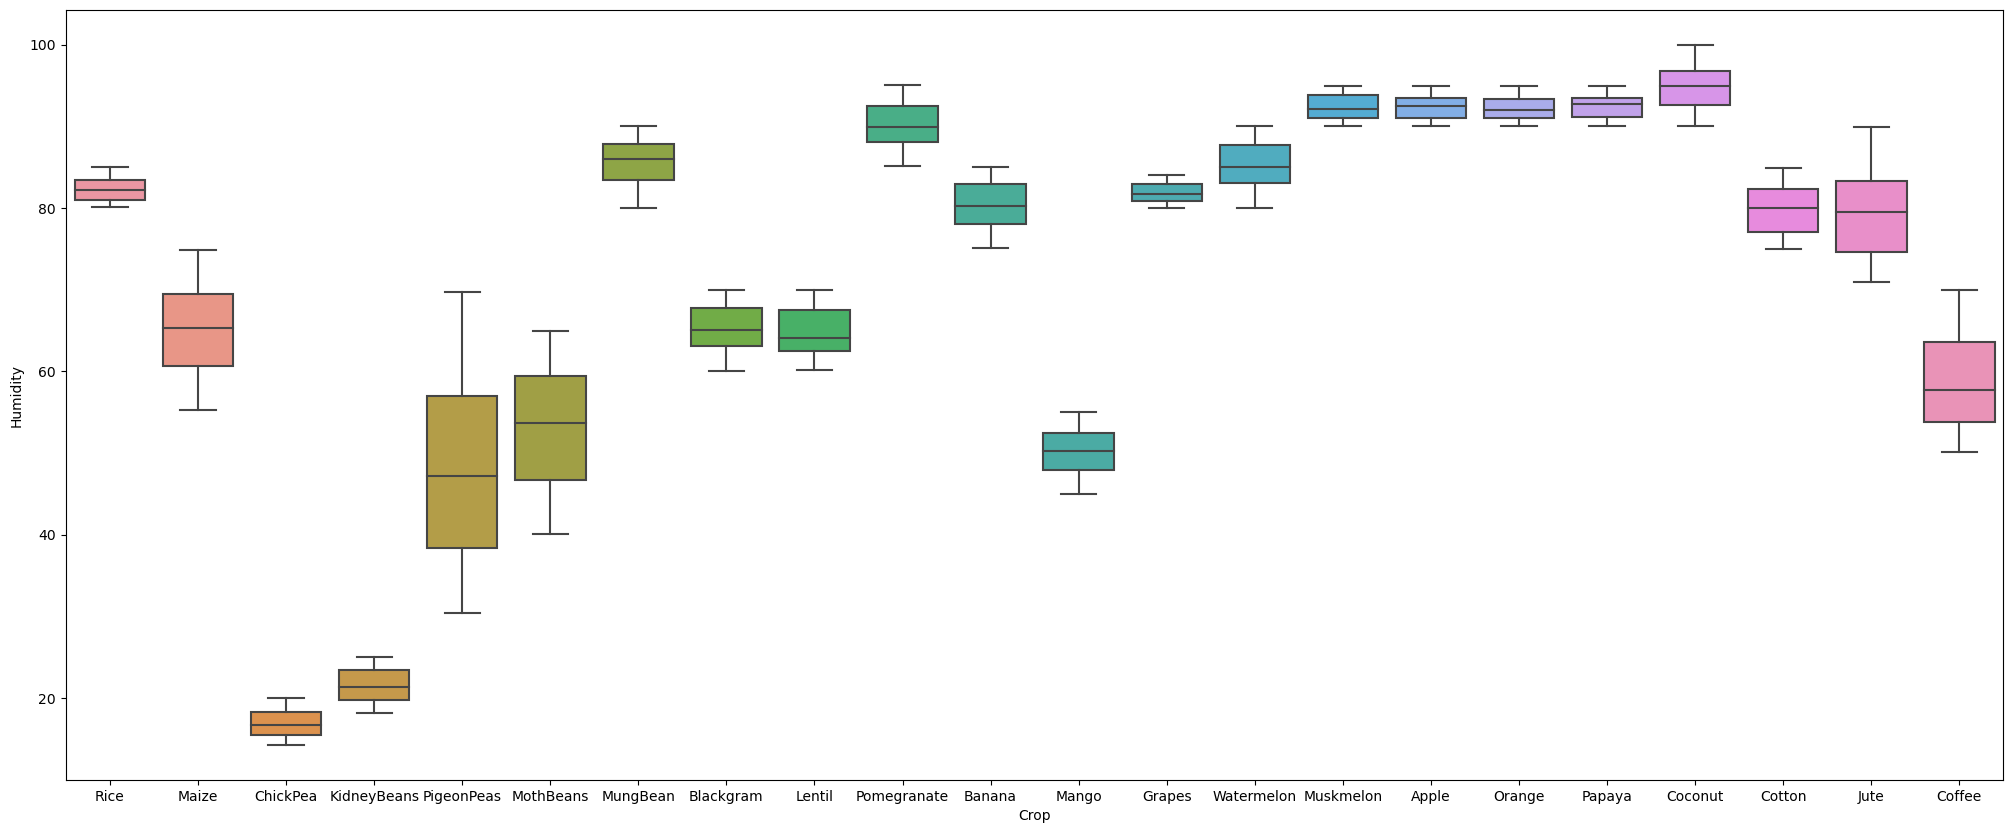

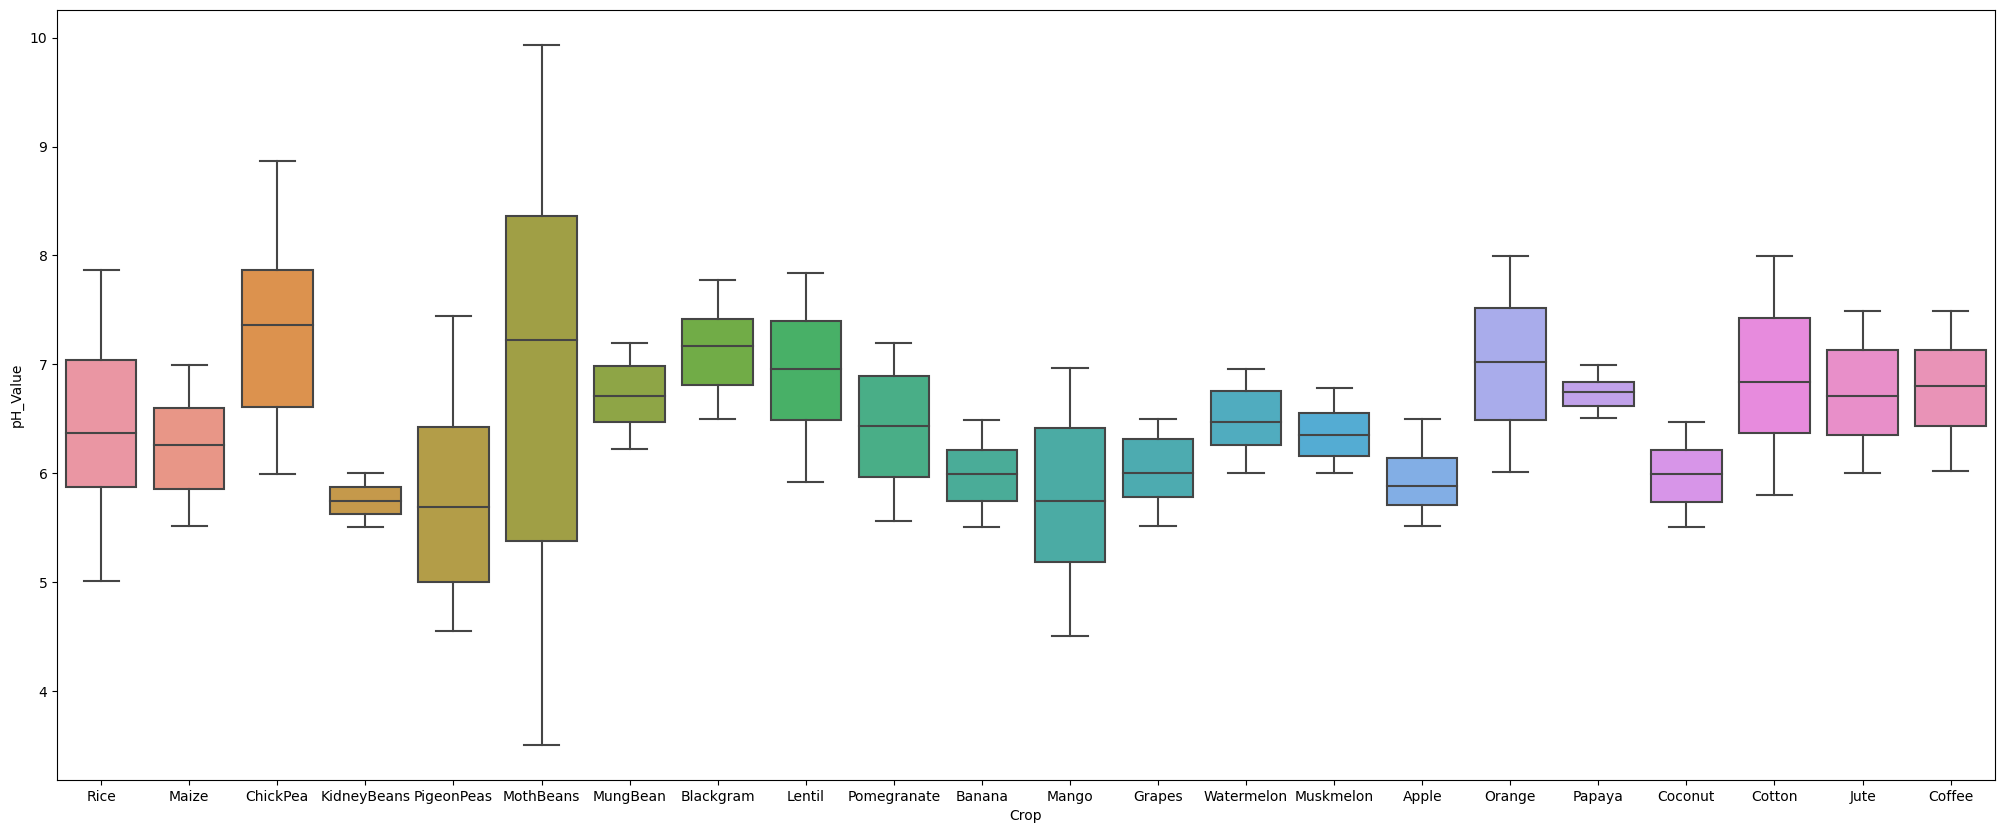

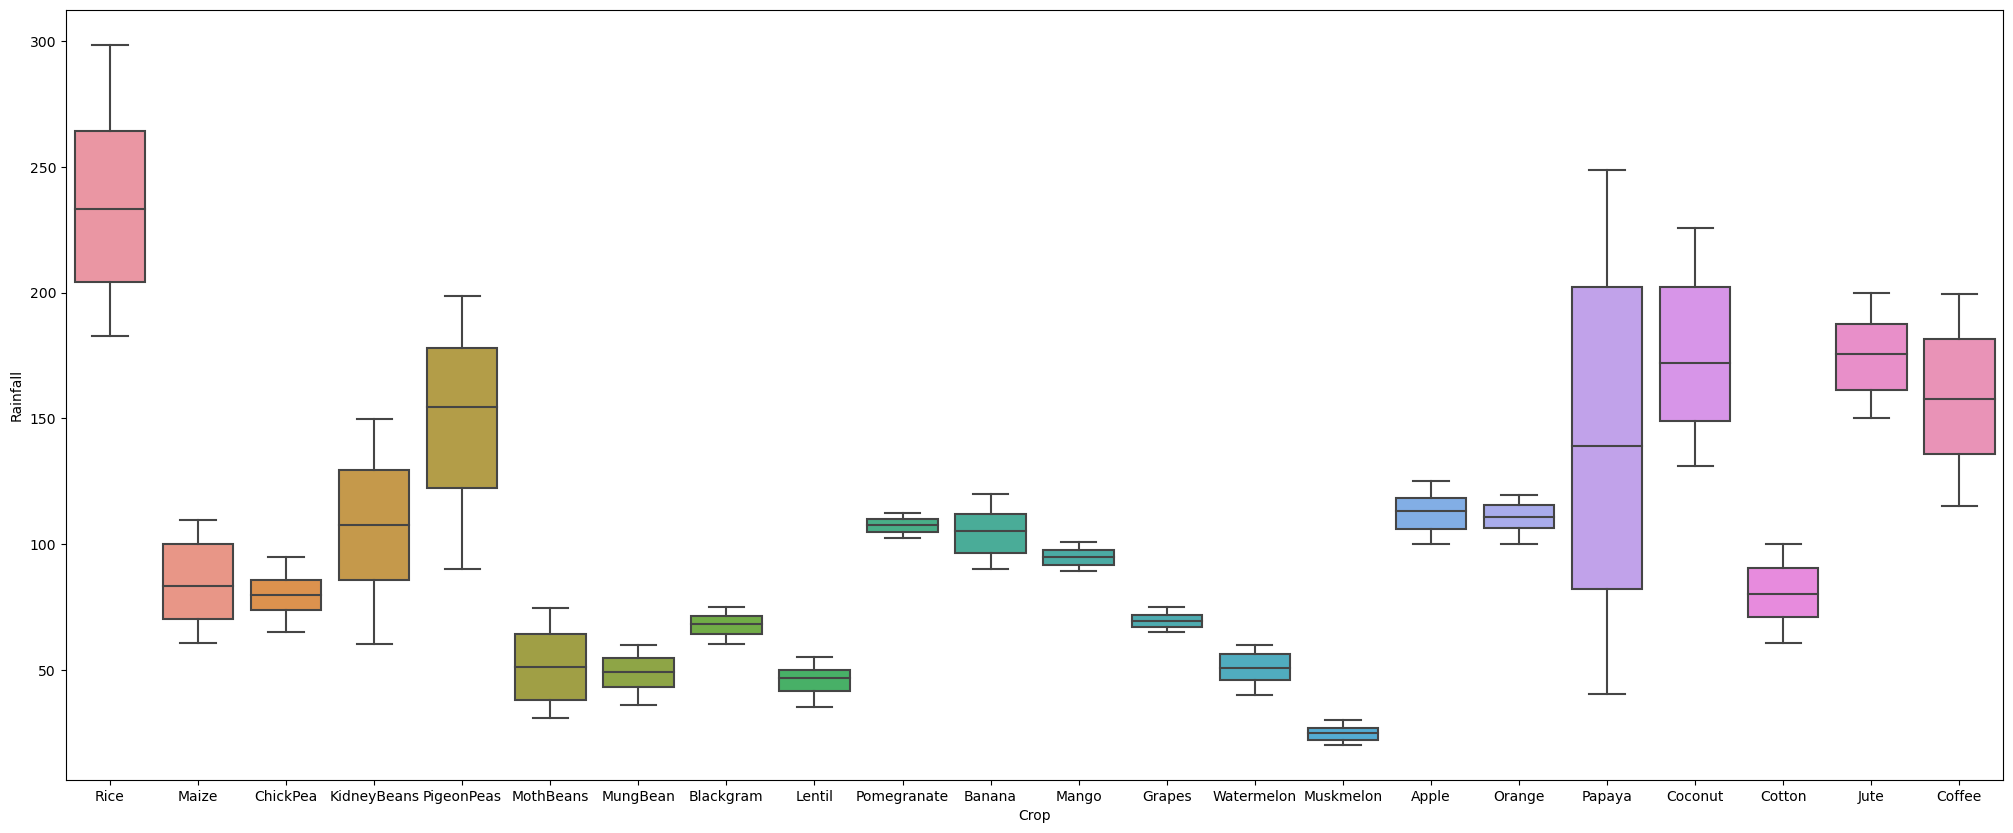

In [12]:
# box plot for crop based on different factors
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='Nitrogen',x='Crop')
plt.show()
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='Phosphorus',x='Crop')
plt.show()
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='Potassium',x='Crop')
plt.show()
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='Temperature',x='Crop')
plt.show()
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='Humidity',x='Crop')
plt.show()
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='pH_Value',x='Crop')
plt.show()
plt.subplots(figsize=(25,10))
sns.boxplot(data=df, y='Rainfall',x='Crop')
plt.show()

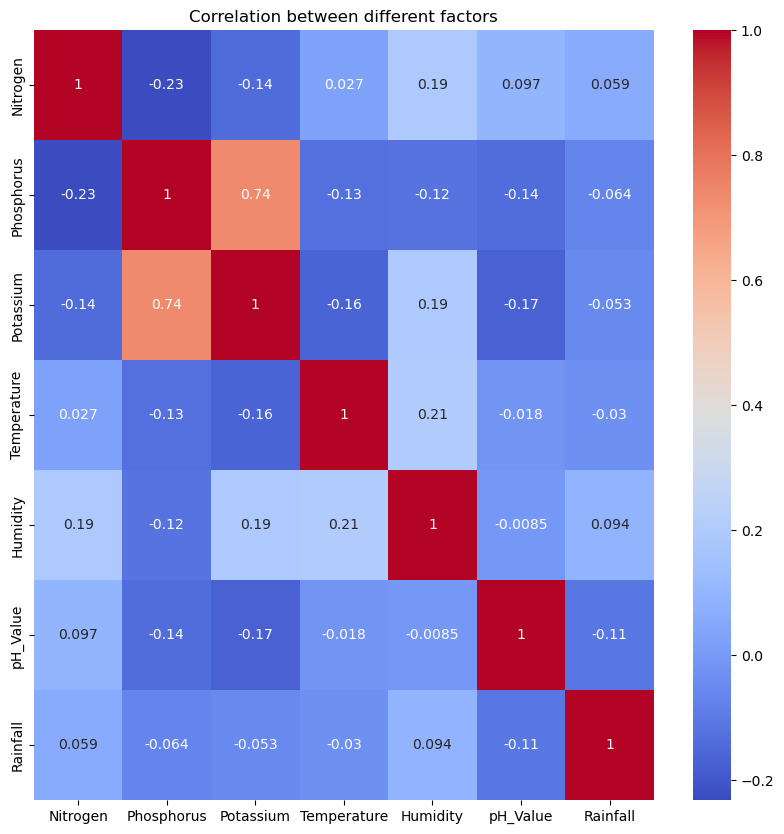

In [13]:
# checking for correlation between different facotrs
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between different factors')
plt.show()

In [14]:
# crate dependent and independet set
X=df.drop('Crop',axis=1)
Y=df['Crop']

In [15]:
# Spliting dependent and independent set in train and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, shuffle=True,random_state=0)

In [16]:
# Best model building
# Applying logistic regression model on train data, checking on test data
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)
acc_lr=accuracy_score(pred_lr,Y_test) # checking for accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Applying logistic regression model on train data, checking on test data
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
pred_rf=rf.predict(X_test)
acc_rf=accuracy_score(pred_rf,Y_test) # checking for accuracy

In [18]:
# Applying support vector model on train data, checking on test data
svm=SVC()
svm.fit(X_train,Y_train)
pred_svm=svm.predict(X_test)
acc_svm=accuracy_score(pred_svm,Y_test)  # checking for accuracy

In [19]:
# Applying Gaussian Naive Bayes model on train data, checking on test data
nb=GaussianNB()
nb.fit(X_train,Y_train)
pred_nb=nb.predict(X_test)
acc_nb=accuracy_score(pred_nb,Y_test) # checking for accuracy

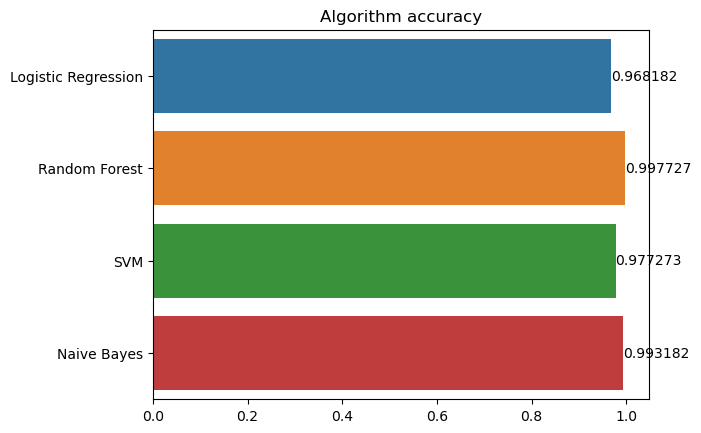

In [20]:
# ploting the accuracy of each model and comparing
acc_scores=[acc_lr,acc_rf,acc_svm,acc_nb]
methods=['Logistic Regression','Random Forest','SVM','Naive Bayes']
acc_plot=sns.barplot(x=acc_scores,y=methods)
for i in acc_plot.containers:
    acc_plot.bar_label(i, size=10)
plt.title('Algorithm accuracy')
plt.show()

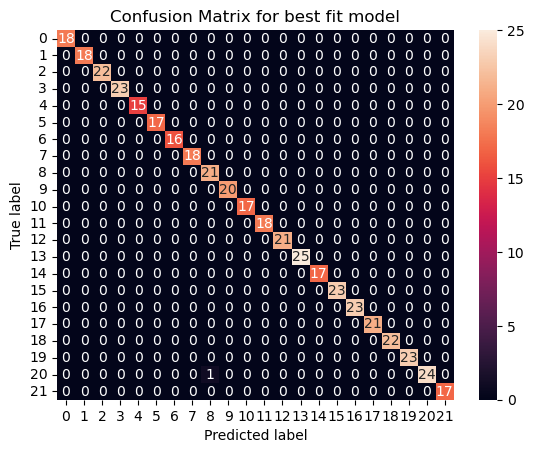

In [21]:
# creat confusion matrix for best fitted model (random forest with accuracy0.997)
cm=confusion_matrix(Y_test,pred_rf)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for best fit model')
plt.show()